# 11-LEARN-DataAnalysisML2

In [1]:
import pandas as pd

This is the data after data processing in the previous notebook. 

Lets setup AutoML

In [3]:
import h2o
from h2o.automl import H2OAutoML

In [4]:
# If this doesnt work - install java. 
# Start the H2O cluster (locally)
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O_cluster_uptime:,15 mins 23 secs
H2O_cluster_timezone:,Europe/Copenhagen
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,2 months and 10 days
H2O_cluster_name:,H2O_from_python_lucaslevassor_g81mwp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.162 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


### Import out dataframe to h20 object

Train a model based on the target and the df

In [5]:
# Run ML with new input 

new_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/processed/input_for_ml_2nd_iteration.csv')
new_input_for_ml

,Line Name,0,1,2,3,Amt_norm
0,yp53_A01,4,1,5,2,9.058562
1,yp53_A02,4,1,5,2,28.175952
2,yp53_A04,4,2,5,2,80.375862
3,yp53_A05,5,1,5,2,119.800397
4,yp53_A06,5,1,5,2,121.767572
...,...,...,...,...,...,...
122,yp54_F02,7,2,5,7,2.814061
123,yp54_F03,7,2,5,7,2.560352
124,yp54_F04,7,2,6,7,2.256023
125,yp54_F05,4,2,5,2,54.525222


In [6]:
df_test = h2o.H2OFrame(pd.concat([new_input_for_ml], axis='columns'))
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:127
Cols:6




,Line Name,0,1,2,3,Amt_norm
type,string,int,int,int,int,real
mins,NaN,3.0,1.0,5.0,1.0,0.0
mean,NaN,4.968503937007874,1.4094488188976375,5.582677165354331,3.9370078740157473,46.81281188418623
maxs,NaN,7.0,2.0,6.0,7.0,169.63139586518082
sigma,NaN,1.430600983014979,0.49367958744323,0.4950700588852039,1.9750347856935107,48.809105181324824
zeros,0,0,0,0,0,11
missing,0,0,0,0,0,0
0,yp53_A01,4.0,1.0,5.0,2.0,9.05856182631404
1,yp53_A02,4.0,1.0,5.0,2.0,28.17595190121824
2,yp53_A04,4.0,2.0,5.0,2.0,80.37586179757339


In [7]:
# Since the data is categorical we need to make it from numerical to categorical 

df_test['0']= df_test['0'].asfactor()
df_test['1']= df_test['1'].asfactor()
df_test['2'] = df_test['2'].asfactor()
df_test['3'] = df_test['3'].asfactor()


In [8]:
df_test.describe()

Rows:127
Cols:6




,Line Name,0,1,2,3,Amt_norm
type,string,enum,enum,enum,enum,real
mins,NaN,,,,,0.0
mean,NaN,,,,,46.81281188418623
maxs,NaN,,,,,169.63139586518082
sigma,NaN,,,,,48.809105181324824
zeros,0,,,,,11
missing,0,0,0,0,0,0
0,yp53_A01,4,1,5,2,9.05856182631404
1,yp53_A02,4,1,5,2,28.17595190121824
2,yp53_A04,4,2,5,2,80.37586179757339


Set some arguments for the autoML. 


Important here is that we dont split the dataset but rather keep the cross-validation validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split. See: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html


### RUN automl

Here we are defining the autoML object and after we can train it

In [9]:
# Select the columns we want to train on
feature_cols = [0, 1, 2, 3]

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs=0,  # 1 hour, if unlimited time is wanted then set this to zero = 0
    max_models=None,  # no limit
    nfolds=5,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
    seed=1,            # Reproducibility
    keep_cross_validation_predictions=True 
)

Train a model based on the target and the df. 


It has been Commented out and saved as showed below

In [10]:
%%time

AutoML.train(
     x=feature_cols,
     y='Amt_norm',
     training_frame=df_test,
 )


AutoML progress: |
10:28:02.66: _train param, Dropping bad and constant columns: [Line Name]


10:28:03.199: _train param, Dropping bad and constant columns: [Line Name]

█
10:28:04.49: _train param, Dropping bad and constant columns: [Line Name]
10:28:04.49: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 127.0.
10:28:04.70: _train param, Dropping unused columns: [Line Name]


10:28:04.372: _train param, Dropping bad and constant columns: [Line Name]
10:28:04.912: _train param, Dropping bad and constant columns: [Line Name]

█
10:28:05.726: _train param, Dropping bad and constant columns: [Line Name]

█
10:28:06.398: _train param, Dropping bad and constant columns: [Line Name]

██
10:28:07.427: _train param, Dropping bad and constant columns: [Line Name]

██
10:28:09.590: _train param, Dropping unused columns: [Line Name]
10:28:10.20: _train param, Dropping unused columns: [Line Name]

██
10:28:10.422:

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,32.0,32.0,4607.0,1.0,6.0,3.875,2.0,14.0,6.8125




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1345.5100587099034
RMSE: 36.68119489206838
MAE: 29.430977476777244
RMSLE: 1.7029298782016014
Mean Residual Deviance: 1345.5100587099034

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 1660.9318054970797
RMSE: 40.75453110387948
MAE: 32.65210065955199
RMSLE: 1.7541203824462905
Mean Residual Deviance: 1660.9318054970797

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,32.542010,4.274705,29.205856,27.281385,33.151210,35.531700,37.539900
1,mean_residual_deviance,1691.342000,252.472060,1629.425700,1278.228800,1846.552600,1800.066700,1902.436800
2,mse,1691.342000,252.472060,1629.425700,1278.228800,1846.552600,1800.066700,1902.436800
3,r2,0.240284,0.164883,0.221198,0.244295,0.094521,0.513296,0.128109
4,residual_deviance,1691.342000,252.472060,1629.425700,1278.228800,1846.552600,1800.066700,1902.436800
5,rmse,41.026825,3.190157,40.366146,35.752327,42.971535,42.427193,43.616932
6,rmsle,1.750736,0.075546,1.691505,1.797450,1.662346,1.755173,1.847204



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-09-19 11:11:09,7 min 11.535 sec,0.0,48.616563,41.610593,2363.570208
1,,2022-09-19 11:11:09,7 min 11.541 sec,5.0,43.604871,37.231298,1901.384749
2,,2022-09-19 11:11:09,7 min 11.545 sec,10.0,41.256625,35.062888,1702.109088
3,,2022-09-19 11:11:09,7 min 11.551 sec,15.0,38.689997,32.179594,1496.915851
4,,2022-09-19 11:11:09,7 min 11.594 sec,20.0,37.777159,30.805458,1427.113778
5,,2022-09-19 11:11:09,7 min 11.601 sec,25.0,36.976051,29.855756,1367.228327
6,,2022-09-19 11:11:09,7 min 11.605 sec,30.0,36.684399,29.421648,1345.745161
7,,2022-09-19 11:11:09,7 min 11.606 sec,32.0,36.681195,29.430977,1345.510059



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0,365401.531250,1.000000,0.522588
1,1,280017.031250,0.766327,0.400473
2,2,53796.730469,0.147226,0.076939


In [11]:
print('DOOOOOOONE')

DOOOOOOONE


## Processing model


In [12]:
# saving the models
leaderboard = AutoML.leaderboard
model_ids = list(leaderboard['model_id'].as_data_frame().iloc[:,0])


# get rid of models with stacked ensemble - they; the tree-based models, the tree ensemble (GBM or Random Forest) ends up memorizing the training data.
#The model has a poor time generalizing on validation data
for model in model_ids:
    if 'StackedEnsemble' in model:
        model_ids.remove(model)

out_path = 'ConStrain_on_google_colab/Data/processed/ML_second_lib_leaderbords'

for m_id in model_ids:
     mdl = h2o.get_model(m_id)
     h2o.save_model(model=mdl, path=out_path, force=True)


In [13]:
len(model_ids)

902

Now we want to extract the best models that are not StackedEnsemble

In [14]:

df_from_h2o_object = leaderboard.as_data_frame(use_pandas=True, header=True)
df_from_h2o_object

,model_id,rmse,mse,mae,rmsle,mean_residual_deviance
0,GBM_grid_1_AutoML_2_20220919_102801_model_580,40.754531,1660.931805,32.652101,1.754120,1660.931805
1,GBM_grid_1_AutoML_2_20220919_102801_model_663,40.767647,1662.001040,33.267006,1.775597,1662.001040
2,GBM_grid_1_AutoML_2_20220919_102801_model_297,40.825998,1666.762105,33.346921,1.774905,1666.762105
3,GBM_grid_1_AutoML_2_20220919_102801_model_158,40.918241,1674.302427,32.769681,1.753474,1674.302427
4,GBM_grid_1_AutoML_2_20220919_102801_model_743,40.938643,1675.972453,32.877042,1.757868,1675.972453
...,...,...,...,...,...,...
911,XGBoost_grid_1_AutoML_2_20220919_102801_model_13,46.802036,2190.430535,35.113587,1.765793,2190.430535
912,DeepLearning_1_AutoML_2_20220919_102801,47.357375,2242.720959,39.753203,1.924932,2242.720959
913,DeepLearning_grid_3_AutoML_2_20220919_102801_model_53,48.248623,2327.929597,37.355933,NaN,2327.929597
914,StackedEnsemble_AllModels_5_AutoML_2_20220919_102801,48.983387,2399.372194,34.555745,1.844118,2399.372194


In [15]:
index_to_delete = []
for index, row in df_from_h2o_object.iterrows():
    if 'StackedEnsemble' in row['model_id']:
        index_to_delete.append(index)

data_wo_ensemble = df_from_h2o_object.drop(labels=index_to_delete, axis=0)
final_df = h2o.H2OFrame(data_wo_ensemble)
final_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_2_20220919_102801_model_580,40.7545,1660.93,32.6521,1.75412,1660.93
GBM_grid_1_AutoML_2_20220919_102801_model_663,40.7676,1662,33.267,1.7756,1662
GBM_grid_1_AutoML_2_20220919_102801_model_297,40.826,1666.76,33.3469,1.77491,1666.76
GBM_grid_1_AutoML_2_20220919_102801_model_158,40.9182,1674.3,32.7697,1.75347,1674.3
GBM_grid_1_AutoML_2_20220919_102801_model_743,40.9386,1675.97,32.877,1.75787,1675.97
GBM_grid_1_AutoML_2_20220919_102801_model_80,41.0565,1685.63,33.9003,1.79483,1685.63
GBM_grid_1_AutoML_2_20220919_102801_model_733,41.1217,1690.99,33.0743,1.76217,1690.99
DeepLearning_grid_3_AutoML_2_20220919_102801_model_3,41.1377,1692.31,32.8007,1.747,1692.31
GBM_grid_1_AutoML_2_20220919_102801_model_184,41.151,1693.4,32.4066,1.75007,1693.4
DeepLearning_grid_3_AutoML_2_20220919_102801_model_7,41.1561,1693.82,32.7451,1.7623,1693.82


### Saving the best model

In [16]:
best_model = AutoML.get_best_model()
best_model

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_2_20220919_102801_model_580


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,32.0,32.0,4607.0,1.0,6.0,3.875,2.0,14.0,6.8125




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1345.5100587099034
RMSE: 36.68119489206838
MAE: 29.430977476777244
RMSLE: 1.7029298782016014
Mean Residual Deviance: 1345.5100587099034

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 1660.9318054970797
RMSE: 40.75453110387948
MAE: 32.65210065955199
RMSLE: 1.7541203824462905
Mean Residual Deviance: 1660.9318054970797

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,32.542010,4.274705,29.205856,27.281385,33.151210,35.531700,37.539900
1,mean_residual_deviance,1691.342000,252.472060,1629.425700,1278.228800,1846.552600,1800.066700,1902.436800
2,mse,1691.342000,252.472060,1629.425700,1278.228800,1846.552600,1800.066700,1902.436800
3,r2,0.240284,0.164883,0.221198,0.244295,0.094521,0.513296,0.128109
4,residual_deviance,1691.342000,252.472060,1629.425700,1278.228800,1846.552600,1800.066700,1902.436800
5,rmse,41.026825,3.190157,40.366146,35.752327,42.971535,42.427193,43.616932
6,rmsle,1.750736,0.075546,1.691505,1.797450,1.662346,1.755173,1.847204



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-09-19 11:11:09,7 min 11.535 sec,0.0,48.616563,41.610593,2363.570208
1,,2022-09-19 11:11:09,7 min 11.541 sec,5.0,43.604871,37.231298,1901.384749
2,,2022-09-19 11:11:09,7 min 11.545 sec,10.0,41.256625,35.062888,1702.109088
3,,2022-09-19 11:11:09,7 min 11.551 sec,15.0,38.689997,32.179594,1496.915851
4,,2022-09-19 11:11:09,7 min 11.594 sec,20.0,37.777159,30.805458,1427.113778
5,,2022-09-19 11:11:09,7 min 11.601 sec,25.0,36.976051,29.855756,1367.228327
6,,2022-09-19 11:11:09,7 min 11.605 sec,30.0,36.684399,29.421648,1345.745161
7,,2022-09-19 11:11:09,7 min 11.606 sec,32.0,36.681195,29.430977,1345.510059



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0,365401.531250,1.000000,0.522588
1,1,280017.031250,0.766327,0.400473
2,2,53796.730469,0.147226,0.076939


In [17]:
model_path = h2o.save_model(model=best_model, path="ConStrain_on_google_colab/Data/processed/ML_models_second_lib", force=True)

### Exporting the leaderboard

In [18]:
# saving the leaderboard
import os
h2o.export_file(leaderboard, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


### Importing the leaderboard

In [19]:
models_path = 'ConStrain_on_google_colab/Data/processed/ML_second_lib_leaderbords'

lb = h2o.import_file(path=os.path.join(models_path, "aml_leaderboard.h2o"))
lb

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_2_20220919_102801_model_580,40.7545,1660.93,32.6521,1.75412,1660.93
GBM_grid_1_AutoML_2_20220919_102801_model_663,40.7676,1662,33.267,1.7756,1662
GBM_grid_1_AutoML_2_20220919_102801_model_297,40.826,1666.76,33.3469,1.77491,1666.76
GBM_grid_1_AutoML_2_20220919_102801_model_158,40.9182,1674.3,32.7697,1.75347,1674.3
GBM_grid_1_AutoML_2_20220919_102801_model_743,40.9386,1675.97,32.877,1.75787,1675.97
GBM_grid_1_AutoML_2_20220919_102801_model_80,41.0565,1685.63,33.9003,1.79483,1685.63
GBM_grid_1_AutoML_2_20220919_102801_model_733,41.1217,1690.99,33.0743,1.76217,1690.99
DeepLearning_grid_3_AutoML_2_20220919_102801_model_3,41.1377,1692.31,32.8007,1.747,1692.31
GBM_grid_1_AutoML_2_20220919_102801_model_184,41.151,1693.4,32.4066,1.75007,1693.4
DeepLearning_grid_3_AutoML_2_20220919_102801_model_7,41.1561,1693.82,32.7451,1.7623,1693.82


## Importing the best model

In [24]:
best_model = h2o.load_model("ConStrain_on_google_colab/Data/processed/ML_models_second_lib/GBM_grid_1_AutoML_2_20220919_102801_model_580")
my_local_model = h2o.download_model(best_model, path="ConStrain_on_google_colab/Data/processed/ML_models")
uploaded_model = h2o.upload_model(my_local_model)


### Investigate model

In [25]:
best_model.cross_validation_holdout_predictions()

predict
20.2977
20.2088
25.6879
117.944
81.3501
63.8432
64.6647
34.1764
95.5034
37.8615


Get the cross validation predictions

In [26]:
# This is where list of cv preds are stored (one element per fold):
cross_validation_holdout_predictions = best_model.cross_validation_holdout_predictions()
print(cross_validation_holdout_predictions)
print(len(cross_validation_holdout_predictions))

predict
20.2977
20.2088
25.6879
117.944
81.3501
63.8432
64.6647
34.1764
95.5034
37.8615



127


In [27]:
cross_validation_holdout_predictions.frame_id


'cv_holdout_prediction_GBM_grid_1_AutoML_2_20220919_102801_model_580'

In [28]:
cv_fram = cross_validation_holdout_predictions.as_data_frame()
cv_fram.tail(50)

,predict
77,16.942172
78,30.576755
79,56.549822
80,85.947011
81,35.785292
82,90.798147
83,95.503449
84,83.142164
85,94.660528
86,25.939136


In [29]:
# However you most likely want a single-column frame including all cv preds
cross_validation_predictions = best_model.cross_validation_predictions()
print(len(cross_validation_predictions))

5


In [30]:
as_data_frame_df_test = df_test.as_data_frame()
as_data_frame_CV_predictions = cross_validation_holdout_predictions.as_data_frame()

In [31]:
df3 = pd.merge(as_data_frame_df_test, as_data_frame_CV_predictions, left_index=True, right_index=True)
df3.head(50)

,Line Name,0,1,2,3,Amt_norm,predict
0,yp53_A01,4,1,5,2,9.058562,20.297725
1,yp53_A02,4,1,5,2,28.175952,20.208805
2,yp53_A04,4,2,5,2,80.375862,25.687860
3,yp53_A05,5,1,5,2,119.800397,117.943759
4,yp53_A06,5,1,5,2,121.767572,81.350075
5,yp53_A07,5,2,6,2,159.059724,63.843190
6,yp53_A08,5,1,6,2,88.043986,64.664682
7,yp53_A09,6,1,6,2,54.461393,34.176359
8,yp53_A10,6,2,5,2,129.715993,95.503449
9,yp53_A11,6,1,6,2,42.266851,37.861543


<AxesSubplot:xlabel='Line Name'>

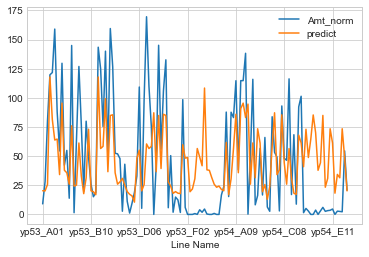

In [32]:
df3.plot(y = ['Amt_norm','predict'], x =  'Line Name')

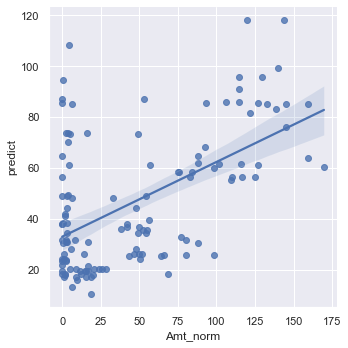

In [33]:
import seaborn as sns
from scipy.stats import pearsonr

#set seaborn plotting aesthetics as default
sns.set()

sns.set_context("paper", font_scale=6.0, rc={"lines.linewidth": 1.5})
sns.set(rc = {'figure.figsize':(20,20)})

sns.lmplot(data=df3, x="Amt_norm", y="predict",  palette="viridis")
None

### Learning curve

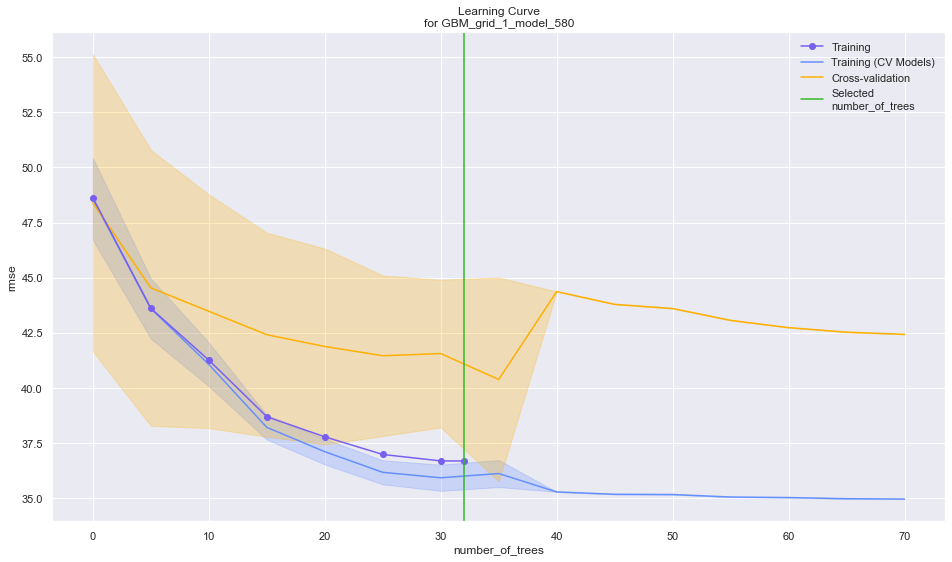

In [34]:

learning_curve = uploaded_model.learning_curve_plot()

#plt.title('Number of records by State')
None

In [35]:
as_data_frame_df_test

,Line Name,0,1,2,3,Amt_norm
0,yp53_A01,4,1,5,2,9.058562
1,yp53_A02,4,1,5,2,28.175952
2,yp53_A04,4,2,5,2,80.375862
3,yp53_A05,5,1,5,2,119.800397
4,yp53_A06,5,1,5,2,121.767572
...,...,...,...,...,...,...
122,yp54_F02,7,2,5,7,2.814061
123,yp54_F03,7,2,5,7,2.560352
124,yp54_F04,7,2,6,7,2.256023
125,yp54_F05,4,2,5,2,54.525222


### Find predicted genotypes

In [36]:
import numpy as np

In [37]:
all_genotypes = pd.read_csv('ConStrain_on_google_colab/Data/processed/remaining_genotypes_after_first_iteration.csv',)
all_genotypes =all_genotypes[['0','1','2','3']]
all_genotypes

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
2,1,1,5,4
3,1,1,5,5
4,1,1,5,7
...,...,...,...,...
1117,8,4,8,6
1118,8,4,8,7
1119,8,4,8,8
1120,8,4,8,9


In [38]:
all_genotypes_df = h2o.H2OFrame(pd.concat([all_genotypes], axis='columns'))
all_genotypes_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3
1,1,5,1
1,1,5,2
1,1,5,4
1,1,5,5
1,1,5,7
1,1,5,8
1,1,5,9
1,1,6,1
1,1,6,2
1,1,6,3


In [39]:
#merge_ = pd.merge(new_input_for_ml,all_genotypes, on= ['0','1','2','3'])
#merge_
new_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/processed/input_for_ml_2nd_iteration.csv',  index_col=False)

input_fixed = new_input_for_ml[['0','1','2','3']]
input_fixed

,0,1,2,3
0,4,1,5,2
1,4,1,5,2
2,4,2,5,2
3,5,1,5,2
4,5,1,5,2
...,...,...,...,...
122,7,2,5,7
123,7,2,5,7
124,7,2,6,7
125,4,2,5,2


### Getting rid of the genotypes we have already tested:

In [40]:
df_diff = all_genotypes[~all_genotypes.apply(tuple,1).isin(input_fixed.apply(tuple,1))]
#df_diff.to_csv('../data/processed/remaining_genotypes_after_first_iteration.csv')
df_diff

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
2,1,1,5,4
3,1,1,5,5
4,1,1,5,7
...,...,...,...,...
1117,8,4,8,6
1118,8,4,8,7
1119,8,4,8,8
1120,8,4,8,9


In [41]:
# make the diff into a df 
all_genotypes_df = h2o.H2OFrame(pd.concat([df_diff], axis='columns'))
all_genotypes_df['0']= all_genotypes_df['0'].asfactor()
all_genotypes_df['1']= all_genotypes_df['1'].asfactor()
all_genotypes_df['2'] = all_genotypes_df['2'].asfactor()
all_genotypes_df['3'] = all_genotypes_df['3'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [42]:
predicted = best_model.predict(all_genotypes_df)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/Users/lucaslevassor/opt/anaconda3/envs/constrain/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column '0' has levels not trained on: ["1", "2", "8"]
  warnings.warn(w)
/Users/lucaslevassor/opt/anaconda3/envs/constrain/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column '1' has levels not trained on: ["3", "4"]
  warnings.warn(w)
/Users/lucaslevassor/opt/anaconda3/envs/constrain/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column '2' has levels not trained on: ["7", "8"]
  warnings.warn(w)


In [43]:
len(predicted)

1049

In [44]:
predicted_norm = predicted.as_data_frame()
predicted_norm.head()

,predict
0,16.662655
1,16.662655
2,16.662655
3,16.662655
4,16.662655


In [45]:
# making predictions into a list
predicted_list = predicted_norm['predict'].values.tolist()

# Adding predictions to our dataframe
df_diff['predicted_norm_strict'] = predicted_list

# Sorting the dataframe
predicted_merged_sorted = df_diff.sort_values('predicted_norm_strict', ascending=False)
predicted_merged_sorted

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_7495/105107836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['predicted_norm_strict'] = predicted_list


,0,1,2,3,predicted_norm_strict
748,6,2,6,2,99.929361
752,6,2,6,8,99.929361
753,6,2,6,9,99.929361
754,6,2,6,10,99.929361
763,6,2,7,9,98.726271
...,...,...,...,...,...
853,7,1,6,2,13.855359
860,7,1,6,9,13.855359
861,7,1,6,10,13.855359
859,7,1,6,8,13.855359


If we want the names on the genotypes we can do the following: 

In [46]:
g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]
promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

g8h_genotype = []
cpr_genotype = []

pg8h_genotype = []
pcpr_genotype = []

predicted_list = []
# adding index of genotypes to individual rows 
for index, row in predicted_merged_sorted.iterrows():
    g8h_genotype.append(g8h_list_of_index[int(row['0'])-1])
    cpr_genotype.append(cpr_list_of_index[int(row['3'])-1])
    pg8h_genotype.append(promoters[int(row['1'])-1])
    pcpr_genotype.append(promoters[int(row['2'])-1])
    predicted_list.append(row['predicted_norm_strict'])
    
    
list_of_lists = [g8h_genotype,pg8h_genotype,pcpr_genotype, cpr_genotype, predicted_list  ]

## Top 20 predicted producers

In [47]:
df_with_genotypes = pd.DataFrame(list_of_lists )
df_with_genotypes = df_with_genotypes.T
df_with_genotypes.columns = ['G8H', 'pG8H', 'pCPR', 'CPR', 'Predicted_stric_production']
df_with_genotypes.head(20)


,G8H,pG8H,pCPR,CPR,Predicted_stric_production
0,Rsep,ENO2,TPI1,Aan,99.929361
1,Rsep,ENO2,TPI1,Cac,99.929361
2,Rsep,ENO2,TPI1,Oeu,99.929361
3,Rsep,ENO2,TPI1,Cpo,99.929361
4,Rsep,ENO2,MLS1,Oeu,98.726271
5,Rsep,ENO2,URE2,Ahu,98.726271
6,Rsep,ENO2,URE2,Rse,98.726271
7,Rsep,ENO2,URE2,Clo,98.726271
8,Rsep,ENO2,URE2,Ara,98.726271
9,Rsep,ENO2,URE2,Aan,98.726271


In [48]:
df_with_genotypes.to_csv('../data/processed/ML_predicted/2022_2807_categorical_GBM_grid_1_AutoML_2_20220919_102801_model_580')